In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from tqdm import tqdm
import os

In [11]:
def load_data(path='data'):
    data = []
    files = []
    for file in tqdm(os.listdir(path)):
        if '.jpg' in file:
            files.append(file)
            img_cv = cv2.imread(os.path.join(path, file))
            img = img_cv[:, :, ::-1]
            img = img.reshape(40000, 3)
            
            data.extend(img)
    return np.array(data).astype('float32') / 255., files

In [14]:
all_data, files = load_data()

100%|██████████| 480/480 [00:02<00:00, 167.89it/s]


In [15]:
all_data.shape

(19200000, 3)

In [26]:
kmean = KMeans(n_clusters=10, random_state=0)
y_pred = kmean.fit_predict(all_data)

In [27]:
y_pred.shape

(19200000,)

In [28]:
y_pred_1 = y_pred.reshape(480, 200, 200)

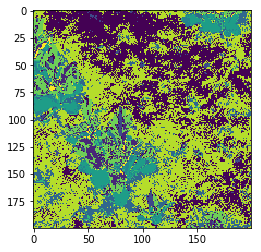

In [45]:
plt.imshow(y_pred_1[0])

In [32]:
y_pred_1[12]

array([[5, 5, 5, ..., 1, 9, 1],
       [5, 5, 5, ..., 1, 1, 7],
       [5, 5, 5, ..., 1, 1, 7],
       ...,
       [5, 5, 5, ..., 6, 8, 3],
       [5, 5, 5, ..., 3, 8, 0],
       [5, 5, 5, ..., 3, 0, 2]], dtype=int32)

In [44]:
files[201]

'im_267.jpg'

In [ ]:
def add_overlay_img(img, overlay):
    img_1 = img.copy()

    overlay = img.copy()
    output = img.copy()
    cv2.rectangle(overlay, (index[0] * 20, index[1] * 20), (index[0] * 20 + 20, index[1] * 20 + 20), color, -1)
    
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    return img_1